### 공공데이터 1일차 과제
[1] 대구 기온 데이터에서 시작연도, 마지막 연도를 입력하고 특정 월의 최고 기온 및 최저 기온의 평균값을 구하고 그래프로 표현
- daegu_utf8.csv 또는 daegu_utf8_df.csv 사용
- 
- 화면에서 측정할 달을 입력 받아서 진행
- 해당 기간 동안 최고기온 평균값 및 최저기온 평균값 계산
    - 최고기온 및 최저기온 데이터를 이용하여 입력된 달의 각각 평균값을 구함
    - 문자령 형태의 '날짜' 열의 데이터는 datetime 으로 변경함.
- 하나의 그래프 안에 2개의 꺽은선 그래프오 결과를 출력
    - 마이너스 기호 출력 깨짐 방지
    - 입력된 월을 이용하여 그래프의 타이틀 내용 변경
    - 최고 온도는 빨간색, 최저 온도는 파란색으로 표시하고 각각 마커 및 legend를 표시

In [1]:
# 필요한 패키지와 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib # 한글문자 깨짐 방지

In [2]:
# 파일 경로설정
file_path = '../data/daegu_utf8_df.csv'
# 저장을 _로 해서.. 이런 파일명으로 사용합니다.

In [3]:
# 데이터 프레임으로 저장하기
weather_df = pd.read_csv(file_path, encoding='utf-8-sig')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42180 entries, 0 to 42179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      42180 non-null  object 
 1   지점      42180 non-null  float64
 2   평균기온    42180 non-null  float64
 3   최저기온    42180 non-null  float64
 4   최고기온    42180 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [4]:
# object인 '날짜'데이터타입 변경하기
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42180 entries, 0 to 42179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      42180 non-null  datetime64[ns]
 1   지점      42180 non-null  float64       
 2   평균기온    42180 non-null  float64       
 3   최저기온    42180 non-null  float64       
 4   최고기온    42180 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.6 MB


In [5]:
# 필요한 값을 입력 받는 함수
def need_date():
    strat_year = int(input("시작 연도를 입력하세요: "))
    end_year = int(input("마지막 연도를 입력하세요: "))
    search_month = int(input("기온 변화를 측정할 달을 입력하세요: "))
    

    return strat_year, end_year, search_month

In [47]:
import numpy as np
# 그래프를 그리는 함수
def draw_graph(title, x_data, max_temp_list, label_1, min_temp_list, label_2, xticks):
    plt.figure(figsize=(20,5))
    plt.plot(x_data, max_temp_list, color='red', marker='o', label=label_1)
    plt.plot(x_data, min_temp_list, color='blue', marker='s', label=label_2)
    plt.title(title)
    plt.xticks(np.arange(0, len(xticks), 1), xticks)
    plt.legend()
    plt.show()

In [48]:
# 원하는 년도들과 월의 평균 최고 , 최저 기온을 구하는 메인함수
def main_temp():
    # 변수 받아오기, 시작년도, 마지막년도, 변화를 볼 달
    start_year, end_year, search_month = need_date()
    
    # 최고기온의 평균, 최저기온의 평균을 담을 리스트
    max_temp_mean_list = []
    min_temp_mean_list = []
    
    # 평균을 구하자
    year = start_year
    xticks = [] # 그래프 x축 눈금 라벨
    while (year < end_year+1):
        # 최고기온 평균 구하기
        max_temp_df = weather_df[(weather_df['날짜'].dt.year == year) & (weather_df['날짜'].dt.month == search_month)]
        max_temp_mean_list.append(float(round(max_temp_df['최고기온'].mean(), 1)))
        
        # 최저기온 평균 구하기
        min_temp_df = weather_df[(weather_df['날짜'].dt.year == year) & (weather_df['날짜'].dt.month == search_month)]
        min_temp_mean_list.append(float(round(min_temp_df['최저기온'].mean(), 1)))
        
        xticks.append(year)
        year += 1
        
    # title과 구한 평균값 출력하기
    title = f"{start_year}부터 {end_year}까지 {search_month}월의 기온 변화"
    print(title)
    print(f"{search_month}월 최저기온 평균:\n{max_temp_mean_list}")
    print(f"\n{search_month}월 최저기온 평균:\n{min_temp_mean_list}")
    
    x_data = [x for x in range(end_year-start_year+1)]
    draw_graph(title=title, x_data=x_data, max_temp_list=max_temp_mean_list, label_1='최고기온', min_temp_list=min_temp_mean_list, label_2='최저기온', xticks=xticks)

2001부터 2023까지 8월의 기온 변화
8월 최저기온 평균:
[31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5, 31.4, 31.9]

8월 최저기온 평균:
[23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4, 23.4, 24.0]


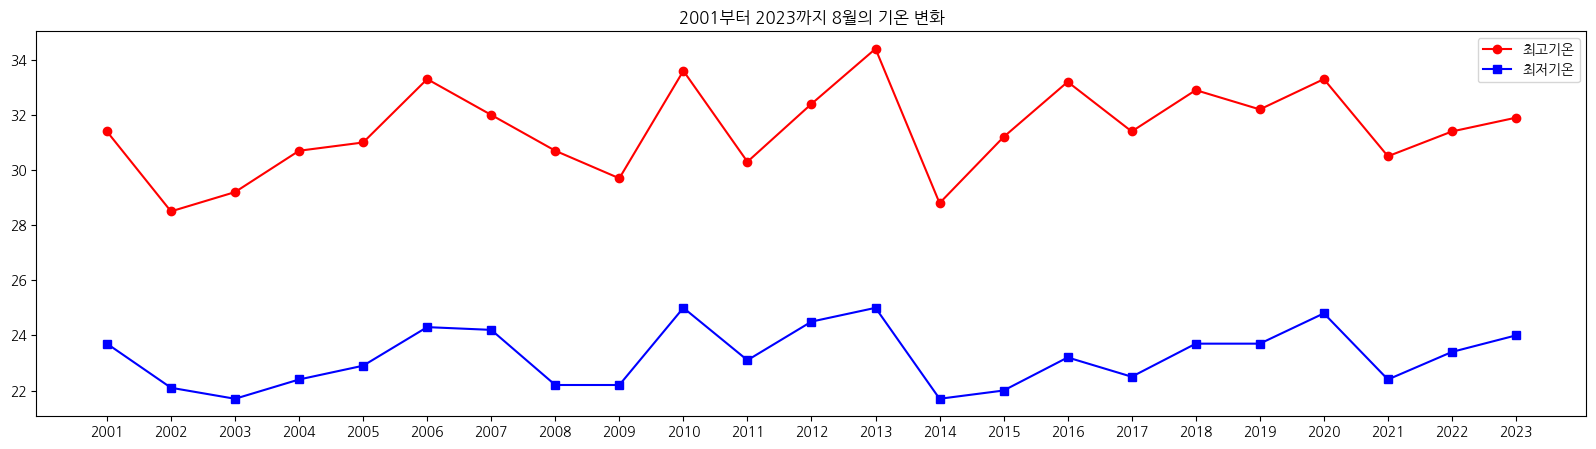

In [49]:
main_temp()